# International College of Economics and Finance 

# Financial Econometrics. Class 05

# Bootstrap

- Inspired by:
    - Chapter 10 of [Bruce Hansen’s graduate econometrics textbook ](https://www.ssc.wisc.edu/~bhansen/econometrics/Econometrics.pdf)
    - https://is.muni.cz/el/1431/podzim2007/MRT10/um/bootstrapBRNO.pdf
    - http://people.tamu.edu/~alawing/materials/ESSM689/Btutorial.pdf
    - [In python](https://mlcourse.ai/articles/topic5-part1-bagging/) (actually, it is more about bagging)
    - Books:
        - An Introduction to Bootstrap, B. Efron and R. J. Tibshirani, Chapman and Hall, 1998
        - Bootstrap Methods and Their Application, A. Davidson and D. Hinkley, Cambridge University Press, 1997

# Class outline
- Overview of Bootstrap
- Types of Bootstrap
- Model Confidence Set

## Some theory

- Suppose we have a random sample $X = {X_{1}, X_{2}, X_{3},...,X_{n}}$ taken from an unknown probability distribution, *F*, and the values $x = {x_{1}, x_{2}, x_{3},...,x_{n}}$ are observed
- Usually we assume something about population and derive some estimator $\hat{\theta}$ of the given sample
- In the bootstrap paradigm, the original sample, **x**, takes place that population holds in the traditional approach
- The resampled values are called a bootstrap sample and are denoted $x^{*}$
- The fundamental bootstrap assumption is that the sampling distribution of the statistic under the unknown probability distribution *F* may by approximated by the sampling distribution of $\hat{\theta}^{*}$ under the empirical probability distribtuion of $\hat{F}$

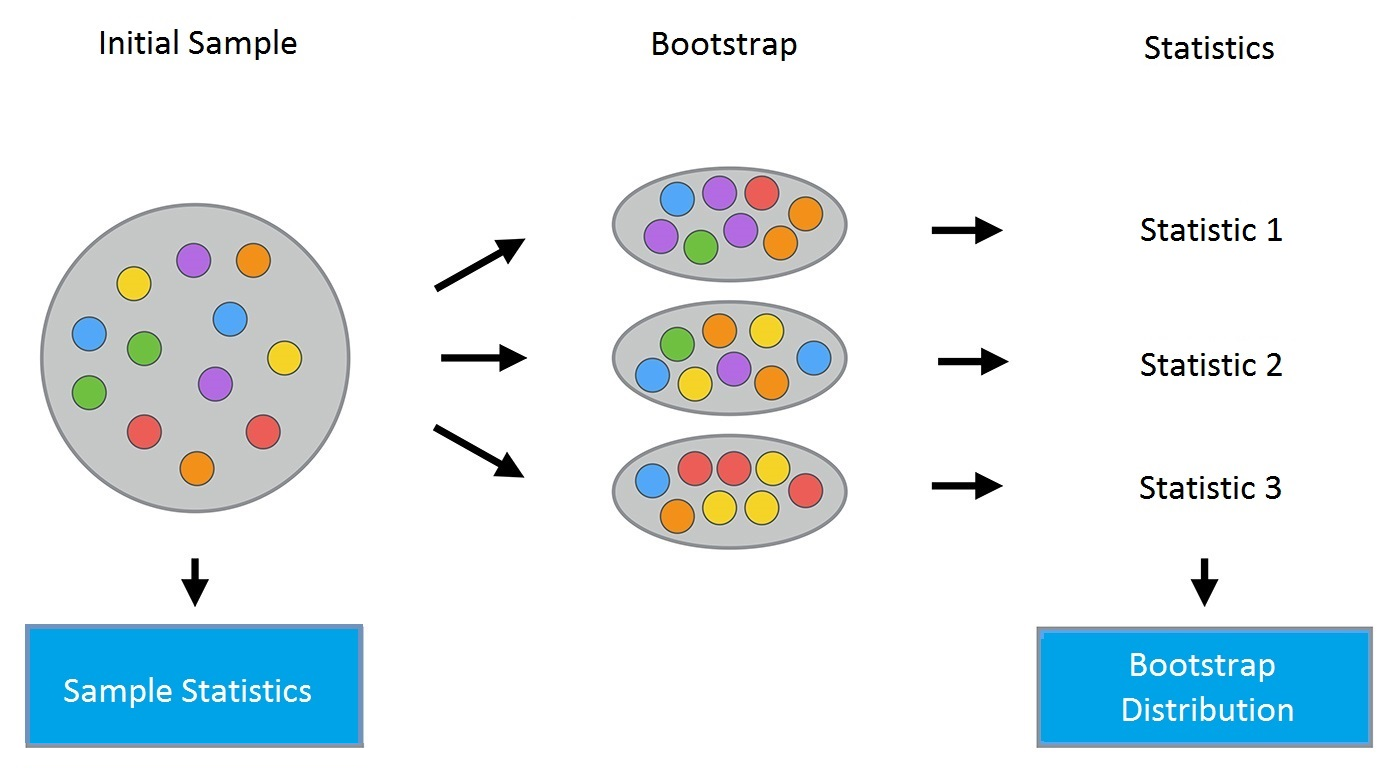

## Example

- Let's start with something simple
- First of all, let's explore what is bootstrap sample
- Suppose we have some sample *x*

In [1]:
x <- c(10, 15, 25, 37, 48, 23, 44, 19, 32, 20)
set.seed(123)

In [2]:
# We want to randomly choose values from x in order to create the new vector

# I highly recommend you to use function sample() -> in order to get help: use command ?sample

# At first let's randomly pick indices of initial values in x
# Don't forget that you resampling with replacement
indices <- ###
 
x.bootstrap <- # Now we should pick values by indices from x
x.bootstrap

[1] 25 25 20 15 23 48 37 23 32 20

- I hope that it is obvious that you can directly use `sample()` function of x

In [3]:
# your code
# it is random, so do not be surprised that result is different

[1] 48 25 32 32 32 25 19 20 44 20

- Congratulations, we have our first bootstrap
- Obviously, the power of this technique is in number of such bootstrapped samples
- So, let's do this, I do not know, like 5000 times

- Ok, we need to do that staff above 5000 times and get 5000 bootstrapped samples
- It seem like you can do it in loop... But I am begging not to
- Let me introduce you such beatiful family of functions as apply() functions
- Additional [reading](https://www.datacamp.com/community/tutorials/r-tutorial-apply-family):  
>The `apply()` family pertains to the R base package and is populated with functions to manipulate slices of data from matrices, arrays, lists and dataframes in a repetitive way. These functions allow crossing the data in a number of ways and avoid explicit use of loop constructs. They act on an input list, matrix or array and apply a named function with one or several optional arguments.  

- The R base manual tells you that it’s called as follows: `apply(X, MARGIN, FUN, ...)`:
    - `X` is an array or a matrix if the dimension of the array is 2
    - `MARGIN` is a variable defining how the function is applied: when `MARGIN=1`, it applies over rows, whereas with `MARGIN=2`, it works over columns. Note that when you use the construct `MARGIN=c(1,2)`, it applies to both rows and columns; and
    - `FUN`, which is the function that you want to apply to the data. It can be any R function, including a User Defined Function (UDF).

In [4]:
# Remember the last class?
# We have some huge matrix
# We want to calculate mean of each column

big.matrix <- matrix(rnorm(50000), ncol = 5, nrow = 10000)

In [5]:
head(big.matrix)

1.7869131,0.77354245,1.53615793,-0.59334419,0.7400380
0.4978505,-0.02820832,-0.09693335,-1.30268241,-0.7117700
-1.9666172,0.35626109,0.13277369,-0.20564946,2.2604747
0.7013559,-1.32699312,-0.52624066,-1.00899775,-0.8587064
-0.4727914,-0.70453750,-1.26427716,0.37548117,0.1226328
-1.0678237,-0.22021853,0.78525155,0.02320516,0.4831192


In [6]:
columns.mean <- # use the apply() function

In [7]:
# checking
round(columns.mean, 10) == round(colMeans(big.matrix), 10)

[1] TRUE TRUE TRUE TRUE TRUE

- But do not we have something more simple for another data types
- List is one of the most popular data types, and, as consequence `apply()` family of functions has special function for it

In [8]:
?lapply

In [9]:
big.list <- list(big.matrix[,1], big.matrix[,2], big.matrix[,3], big.matrix[,4], big.matrix[,5])

In [10]:
columns.mean.list <- # use the lapply() function

In [11]:
# checking
round(unlist(columns.mean.list, use.names = FALSE), 10) == round(colMeans(big.matrix), 10)

[1] TRUE TRUE TRUE TRUE TRUE

- Last function from `apply()` family of functions that I want to show you is `sapply()`
>The `sapply()` function works like `lapply()`, but it tries to simplify the output to the most elementary data structure that is possible. And indeed, `sapply()` is a ‘wrapper’ function for lapply().

In [12]:
columns.mean.simple <- # use the sapply() function

In [13]:
round(columns.mean.simple, 10) == round(colMeans(big.matrix), 10)

[1] TRUE TRUE TRUE TRUE TRUE

- Summary:
    - If you want to work with dataframes $\rightarrow$ `apply()`
    - If you want to work with lists and get a list as an output $\rightarrow$ `lapply()`
    - If you want to work with lists and get a vector $\rightarrow$ `sapply()`

- Also, it is quite convenient to use anonymous functions that can be put into `apply()` family functions
- They are defined like this:
    - `function(x){mean(x)}`
    - `x` in 'function()' and in '{}' may not be the same

## Percentile Bootstrap

In [14]:
# Basically, your X is a generator, like in loop, from 1 to 5000
# Do not forget to convert sample() function result into a function
bootstrap.samples <- #

In [15]:
# Now, let's calculate mean for each of 5000 bootstrapped samples
bootstrap.samples.mean <- #

In [16]:
# Let's calculate quantiles for our vector of 5000 means
CI <- #

In [17]:
cat('Mean of x:', mean(x))
CI

Mean of x: 27.3

5%  95% 
21.2 33.6

- Still, percentile bootstrap is not that good (especially for nonsymmetric distributions)

## Other Bootstrap techniques (Bootstrap Confidence Intervals)
- You discussed basic bootstrap during the lecture
- A small reminder. The idea of basic bootstrap is that $\hat{\theta^{*}}-\hat{\theta}\approx\hat{\theta}-\theta$
- CI for basic bootstrap looks like this:
$$P[\hat{\theta^{*}}_{((B+1)\alpha/2}-\hat{\theta}\leq\hat{\theta}-\theta\leq\hat{\theta^{*}}_{((B+1)(1-\alpha/2)}-\hat{\theta}] $$

- There are other bootstrap technique that you should be aware of:
    - Normal
    - Stundentized (t interval)
    - Bias-corrected and accelerated

### Normal Bootstrap CI

- Incorporates both a bootstrap adjustment for bias and a bootstrap estimate of standard error $$C.I._{1-\alpha}(\theta) = [\hat{\theta}-\hat{Bias(\hat{\theta})}-z_{\alpha/2}\hat{SE}(\hat{\theta});\hat{\theta}-\hat{Bias(\hat{\theta})}+z_{\alpha/2}\hat{SE}(\hat{\theta})]$$
where, 
$$ \hat{Bias(\hat{\theta})} = \bar{\hat{\theta^{*}}}-\hat{\theta}$$
$$ \hat{SE}_{B} = [\sum_{b=1}^{B}\frac{(\hat{\theta^{*}_{b}}-\bar{\hat{\theta^{*}}})^{2}}{B-1}]^{1/2}$$
- Idea of Studentized interval is in replacing the standard normal **Z** by $Z = \frac{\hat{\theta^{*}}-\hat{\theta}}{SE_{B}}$

### Bias-corrected and accelerated version

- Unfortunately, normal **CI** is based on large sample properties, Studentized is recommended only if we have normal distribution and percentile and basic **CI** give biased results if the distribution of $\hat{\theta^{*}}$ is skewed
- The underlying idea of $BC_{a}$ CI is to assume that there exists a transformation of $\hat{\theta}$ which distribtuion is normal and its mean and standard error depend on $\theta$

## Linear regression bootstrap

In [18]:
# Libraries
# For those who has a problem like: package ‘package_name’ is not available (for R version x.x.x)
# install.packages('package_name', dependencies=TRUE, repos='http://cran.rstudio.com/')

library(boot) # great library for bootstrap
library(MCS)
library(quantmod)
library(forecast) #I highly recommend to visit the link above. It explains basics of forecasting and time-series modeling in R

# For those who have operational system in Russian but wants it in English
Sys.setlocale("LC_TIME", "C")
format(Sys.Date(), format = "%Y-%b-%d")

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'forecast' was built under R version 3.6.2"

[1] "C"

[1] "2020-Oct-17"

### Data

In [19]:
head(trees)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


In [20]:
?trees

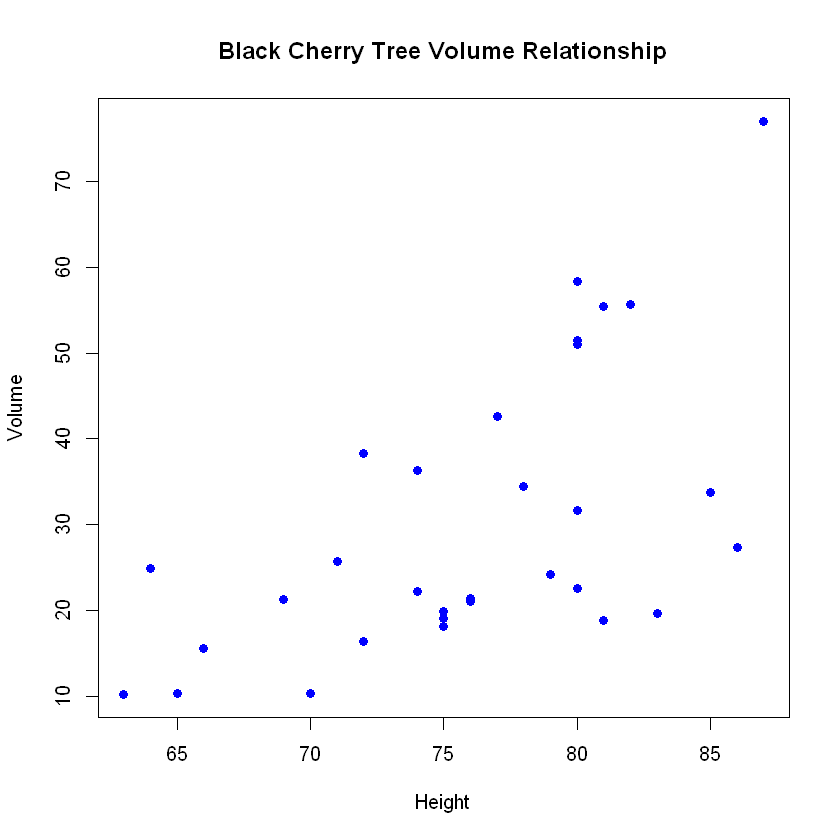

In [21]:
# plot volume against height


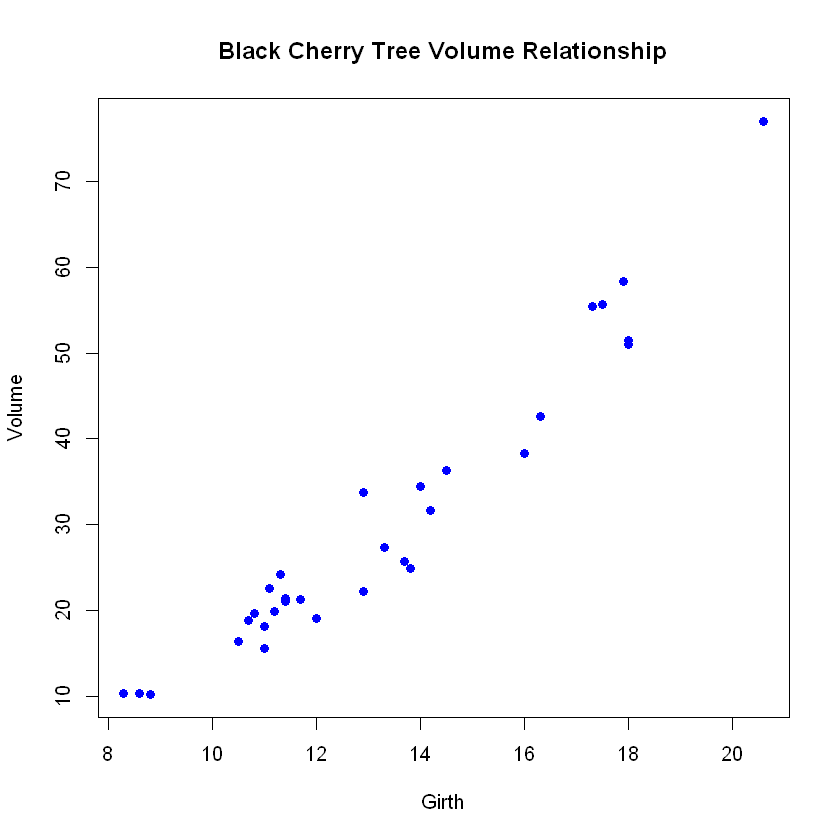

In [22]:
# plot volume against girth


## Linear regression

In [23]:
# First, define the function
reg <- function(data, indices){
    d <-  # we are picking bootstrapped indices
    
    H_relationship <-  # use linear regression of volume on height
    H_r_sq <-  # get the R-squared
    
    G_relationship <-  # use linear regression of volume on girth
    G_r_sq <-  # get the R-square
    
    combined_relationship <-  # use linear regression of volume on height and girth
    combined_r_sq <-  # get the R-square
    
    relationships <-  # put all R-square into one vector
    
    return(relationships)
    
}

In [24]:
lm_boot <- matrix(NA, nrow = 5000, ncol = 3)

for (i in 1:5000){
    lm_boot[i, ] <- # use reg function defined earlier and sample() function
}

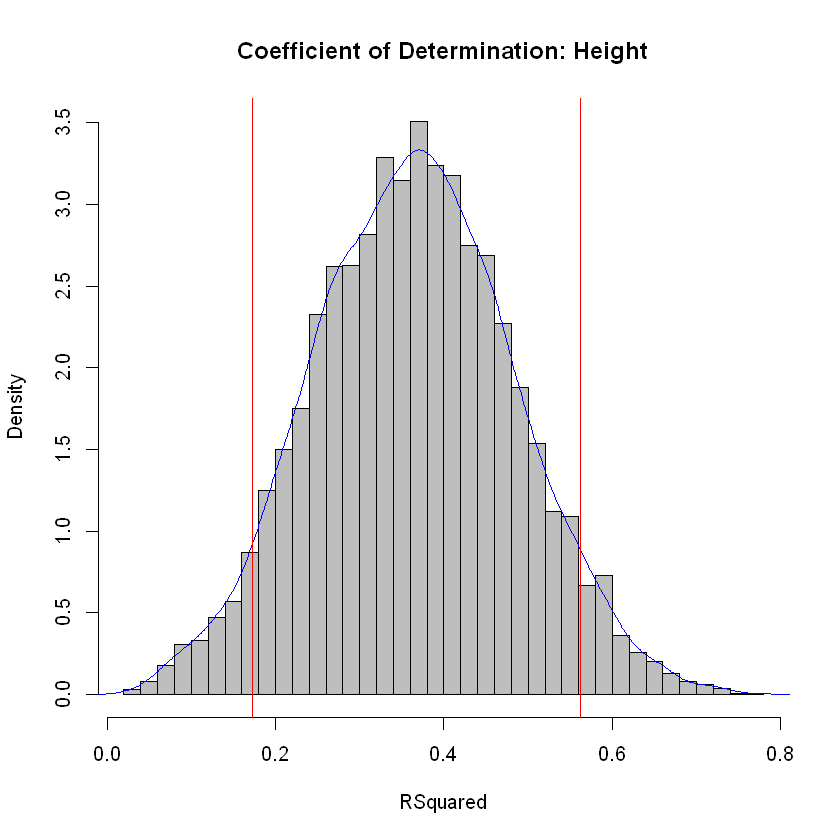

In [25]:
# plot histogram of R-squared for height regression
# plot line of the density of the bootstrapped R-squared for height regression
# add horizontal lines for 5% and 95% percentiles


- Anyway, the library `boot` has much better performance than a basic loop 
- Also, it has `parallel` option which I highly recommend to use

In [26]:
results <- boot(data = trees, statistic = reg, R = 5000)
print(results)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = trees, statistic = reg, R = 5000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.3579026 0.0026632320  0.12029252
t2* 0.9353199 0.0009795899  0.01722568
t3* 0.9479500 0.0035890508  0.01183702


- What about CI

In [27]:
CI <- boot.ci(results, index = 1)
print(CI)

Warning message in boot.ci(results, index = 1):
"bootstrap variances needed for studentized intervals"

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, index = 1)

Intervals : 
Level      Normal              Basic         
95%   ( 0.1195,  0.5910 )   ( 0.1131,  0.5874 )  

Level     Percentile            BCa          
95%   ( 0.1284,  0.6027 )   ( 0.1302,  0.6068 )  
Calculations and Intervals on Original Scale


## Block Bootstrap

- Still, we have a problem when working with time-series
- We have time series dependece and simple resampling would destroy the underlying autocorrelation
- Solution is block bootstrap
- The idea is to resample the data in such blocks, that inside the block the dependeces will be preserved

- It is a data of the numbers of Canadian lynx trapped in the MacKenzie River District of Northwest Canada

In [28]:
?lynx

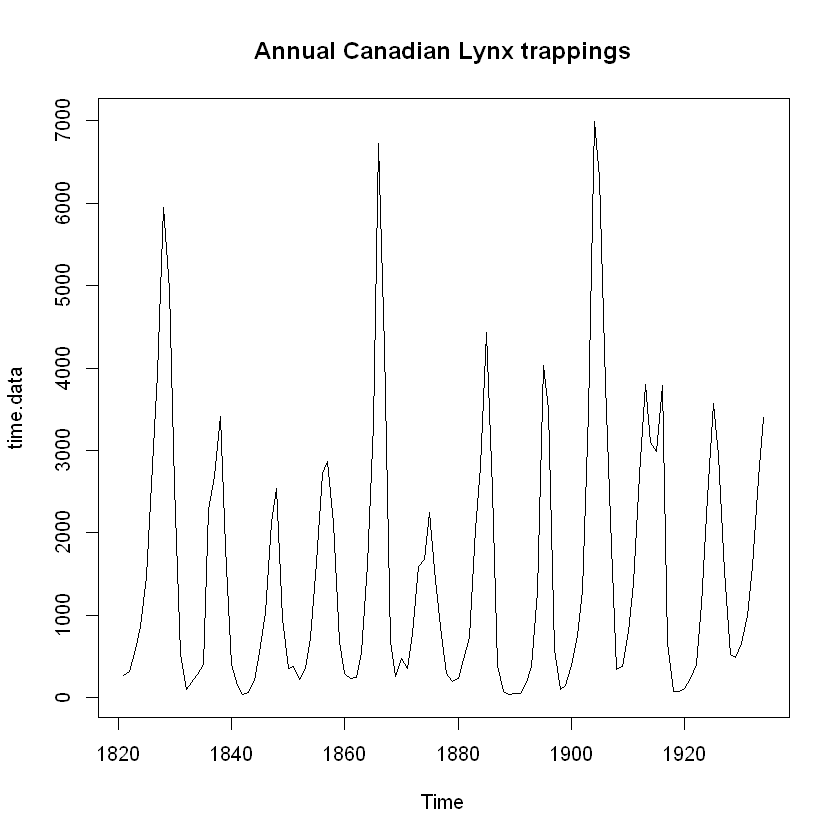

In [29]:
time.data <- lynx
plot(time.data, main = "Annual Canadian Lynx trappings")

- I will not torture you with manually writing block bootstrap
- So, you can use `tsboot()` function

In [30]:
?tsboot

In [31]:
tsboot(lynx, mean, R = 1000, sim = "fixed", l = ar(lynx)$order)


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 8 

Call:
tsboot(tseries = lynx, statistic = mean, R = 1000, l = ar(lynx)$order, 
    sim = "fixed")


Bootstrap Statistics :
    original    bias    std. error
t1* 1538.018 -3.655526    166.9895

## Model Confidence Set

- Now, let's use Model Confidence Set at it does not require that models should be non-nested  
- I highly recommend to read [Bernardi M. and Catania L. (2014)](https://arxiv.org/pdf/1410.8504.pdf) for better understanding

- Let's revisit our previous class (I know, again)

In [32]:
sp <- getSymbols("^GSPC", scr = "yahoo", auto.assign = FALSE)
sp.price <- sp$GSPC.Adjusted
sp.ret <- diff(log(sp.price))[-1] * 100
names(sp.ret) <- c('S&P500 log returns')

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [33]:
N <- length(sp.ret) # let's have a variable with the size\length of our data
N_OOS <- round(x = 0.3 * N, digits = 0) # Usually, 25%-30% of data are used for the prediction period
N_sample <- N - N_OOS

In [34]:
y_train <- vector(mode = 'logical', length = N_sample)

y_pred_mean <- vector(mode = 'logical', length = N_OOS)
y_pred_ar <- vector(mode = 'logical', length = N_OOS)
y_pred_ma <- vector(mode = 'logical', length = N_OOS)
y_pred_arma <- vector(mode = 'logical', length = N_OOS)

y_true <- sp.ret[(N_sample + 1):N]

for (i in 1:N_OOS){
    y_train <- sp.ret[i:(N_sample + i - 1)] #It is a good practice to store your in-sample data
    
    y_pred_mean[i] <- mean(y_train) # Because then you can just call the function on it
    
    ar <- Arima(y_train, order = c(1, 0, 0))
    y_pred_ar[i] <- forecast(object = ar, h = 1)$mean[1]
    
    ma <- Arima(y = y_train, order = c(0, 0, 1))
    y_pred_ma[i] <- forecast(object = ma, h = 1)$mean[1]
    
    arma <- Arima(y = y_train, order = c(1, 0, 1))
    y_pred_arma[i] <- forecast(object = arma, h = 1)$mean[1]

}

y_pred_mean <- as.xts(x = y_pred_mean, order.by = index(y_true))
y_pred_ar <- as.xts(x = y_pred_ar, order.by = index(y_true))
y_pred_ma <- as.xts(x = y_pred_ma, order.by = index(y_true))
y_pred_arma <- as.xts(x = y_pred_arma, order.by = index(y_true))

mse_mean <- mean((y_true - y_pred_mean)^2)
mse_ar <- mean((y_true - y_pred_ar)^2)
mse_ma <- mean((y_true - y_pred_ma)^2)
mse_arma <- mean((y_true - y_pred_arma)^2)

L.mean_model <- (y_true - y_pred_mean)^2
L.ar <- (y_true - y_pred_ar)^2
L.ma <- (y_true - y_pred_ma)^2
L.arma <- (y_true - y_pred_arma)^2

names(L.mean_model) <- 'Mean'
names(L.ma) <- 'MA'
names(L.ar) <- 'AR'
names(L.arma) <- 'ARMA'

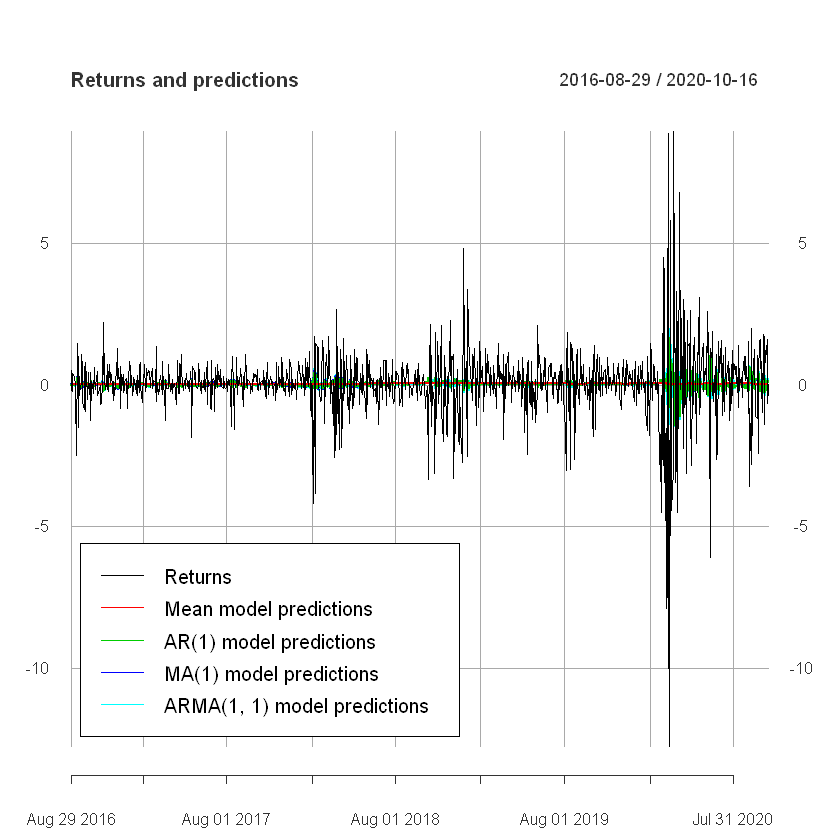

In [35]:
par(xpd = T)
plot(x = cbind(y_true, y_pred_mean, y_pred_ar, y_pred_ma, y_pred_arma), 
     main = 'Returns and predictions', 
     y = index(y_true), 
     col = 1:5,
     lwd = c(1, 2, 2, 2, 2))
legend('bottomleft', 
       legend = c('Returns', 'Mean model predictions', 'AR(1) model predictions', 'MA(1) model predictions', 'ARMA(1, 1) model predictions'), 
       col = 1:5,
       lty = c(1, 1, 1, 1),
       inset = 0.05)

- I assume, that you are familiar with [Model Confidence Set](https://www.kevinsheppard.com/files/teaching/mfe/advanced-econometrics/Hansen_Lunde_Nason.pdf)
- So, I will not put theory here
- Please, read lecture notes and the [original article](https://www.kevinsheppard.com/files/teaching/mfe/advanced-econometrics/Hansen_Lunde_Nason.pdf) or the [version adapted to R](https://arxiv.org/pdf/1410.8504.pdf)
- Also, you can use the R code of [MCS library](https://github.com/cran/MCS/blob/master/R/MCS.R)

In [36]:
Loss <- cbind(L.mean_model, L.ma, L.ar, L.arma)

In [37]:
?MCSprocedure

In [38]:
MCSprocedure(Loss = Loss)

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


###########################################################################################################################
Superior Set Model created	:
     Rank_M       v_M MCS_M Rank_R        v_R  MCS_R     Loss
Mean      4  1.189846 0.241      4  1.2019363 0.3932 1.610762
MA        3 -1.098331 1.000      3  1.1060079 0.5174 1.556341
AR        2 -1.134960 1.000      1 -0.0907855 1.0000 1.546162
ARMA      1 -1.191362 1.000      2  0.0907855 1.0000 1.546791
p-value	:
[1] 0.241

###########################################################################################################################


------------------------------------------
-          Superior Set of Models        -
------------------------------------------
     Rank_M       v_M MCS_M Rank_R        v_R  MCS_R     Loss
Mean      4  1.189846 0.241      4  1.2019363 0.3932 1.610762
MA        3 -1.098331 1.000      3  1.1060079 0.5174 1.556341
AR        2 -1.134960 1.000      1 -0.0907855 1.0000 1.546162
ARMA      1 -1.191362 1.000      2  0.0907855 1.0000 1.546791

Details
------------------------------------------

Number of eliminated models	:	0
Statistic	:	Tmax
Elapsed Time	:	Time difference of 4.003006 secs

In [39]:
MCSprocedure(Loss = Loss, alpha = 0.25)

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


Model Mean eliminated 2020-10-17 06:49:02

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


###########################################################################################################################
Superior Set Model created	:
     Rank_M        v_M  MCS_M Rank_R         v_R  MCS_R     Loss
MA        3  1.0978644 0.3342      3  1.12463146 0.4386 1.556341
AR        1 -0.8671640 1.0000      1 -0.09138567 1.0000 1.546162
ARMA      2 -0.6024615 1.0000      2  0.09138567 1.0000 1.546791
p-value	:
[1] 0.3342

###########################################################################################################################


------------------------------------------
-          Superior Set of Models        -
------------------------------------------
     Rank_M        v_M  MCS_M Rank_R         v_R  MCS_R     Loss
MA        3  1.0978644 0.3342      3  1.12463146 0.4386 1.556341
AR        1 -0.8671640 1.0000      1 -0.09138567 1.0000 1.546162
ARMA      2 -0.6024615 1.0000      2  0.09138567 1.0000 1.546791

Details
------------------------------------------

Number of eliminated models	:	1
Statistic	:	Tmax
Elapsed Time	:	Time difference of 5.363235 secs

In [40]:
MCSprocedure(Loss = Loss, alpha = 0.35)

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


Model Mean eliminated 2020-10-17 06:49:23

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


Model MA eliminated 2020-10-17 06:49:26
###########################################################################################################################
Superior Set Model created	:
     Rank_M        v_M MCS_M Rank_R        v_R MCS_R     Loss
AR        1 -0.0856569 1.000      1 -0.0856569 1.000 1.546162
ARMA      2  0.0856569 0.912      2  0.0856569 0.912 1.546791
p-value	:
[1] 0.912

###########################################################################################################################


------------------------------------------
-          Superior Set of Models        -
------------------------------------------
     Rank_M        v_M MCS_M Rank_R        v_R MCS_R     Loss
AR        1 -0.0856569 1.000      1 -0.0856569 1.000 1.546162
ARMA      2  0.0856569 0.912      2  0.0856569 0.912 1.546791

Details
------------------------------------------

Number of eliminated models	:	2
Statistic	:	Tmax
Elapsed Time	:	Time difference of 7.992569 secs

In [41]:
MCSprocedure(Loss = Loss, alpha = 0.95)

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


Model Mean eliminated 2020-10-17 06:49:47

Warning message in max((abs(d_ij_mean[model_temp]))/(d_var_ij[1, model_temp]^0.5)):
"у 'max' нет не пропущенных аргументов; возвращаю -Inf"


Model MA eliminated 2020-10-17 06:49:50
Model ARMA eliminated 2020-10-17 06:49:52
###########################################################################################################################
Superior Set Model created	:
   Rank_M         v_M MCS_M Rank_R         v_R MCS_R     Loss
AR      1 -0.08580381     1      1 -0.08580381     1 1.546162
p-value	:
[1] 0.9124

###########################################################################################################################


------------------------------------------
-          Superior Set of Models        -
------------------------------------------
   Rank_M         v_M MCS_M Rank_R         v_R MCS_R     Loss
AR      1 -0.08580381     1      1 -0.08580381     1 1.546162

Details
------------------------------------------

Number of eliminated models	:	3
Statistic	:	Tmax
Elapsed Time	:	Time difference of 7.822009 secs